In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import numpy as np
summay_dir = r"/home/lab2/shahar/cluster_dirs/vcf/hgdp/classes/summary/"
tree_height_matrix =  summay_dir + 'tree_heights_per_class_{size}.csv'
ns_ss = 0.01
SCORES = ['max_height', 'avg_height', 'avg_leaves']

mac_min_range = 2
mac_max_range = 18
maf_min_range = 1
maf_max_range = 49
SCORE2COLOR_DICT = {'max_height': 'b', 'avg_height': 'r', 'avg_leaves': 'g'}
class_names = [f'mac_{i}' for i in range(mac_min_range, mac_max_range+1)] + [f'maf_{i / 100}' for i in range(maf_min_range, maf_max_range+1)]

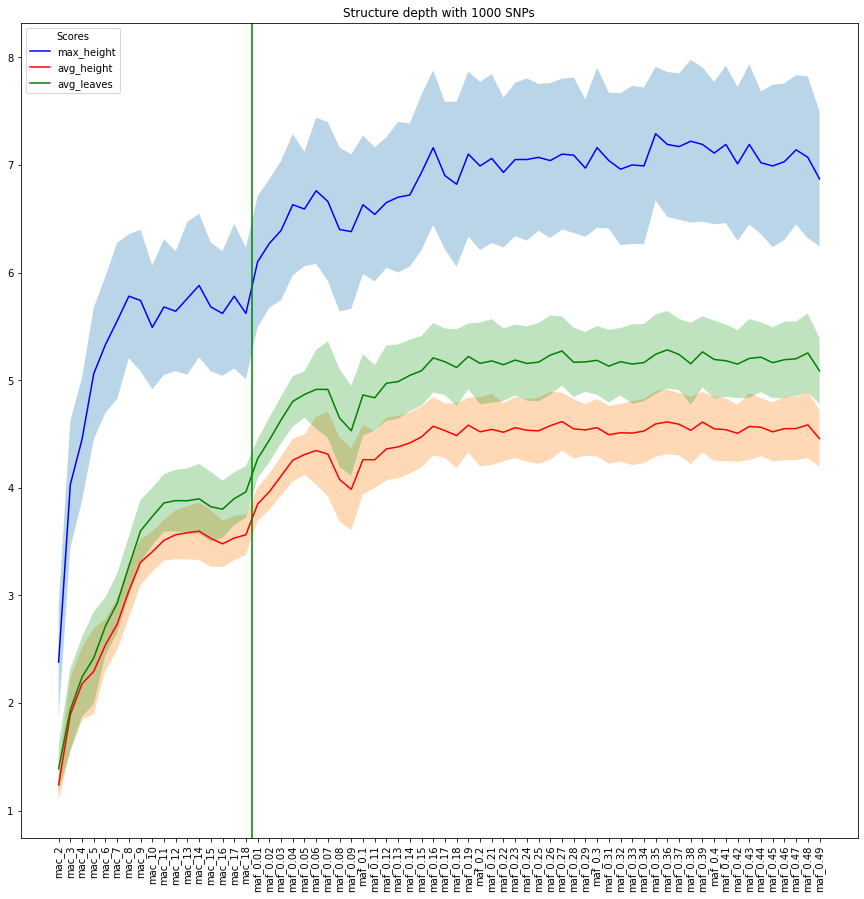

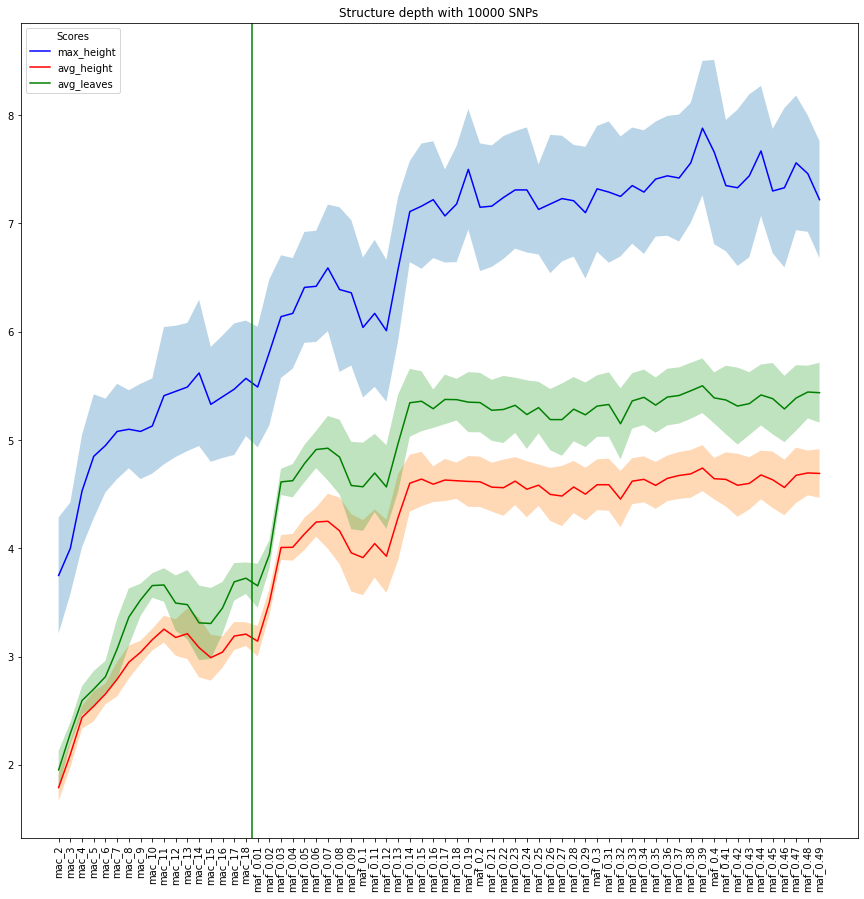

In [3]:
for num_of_snp in [1000, 10000]:
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(15)
    ax = f.add_subplot(111)
    path = tree_height_matrix.format(size=num_of_snp)
    df = pd.read_csv(path)
    for score in SCORES:
        avg = [] 
        std = []
        for mac_maf in ['mac', 'maf']:
            is_mac = mac_maf == 'mac'
            min_range = mac_min_range if is_mac else maf_min_range
            max_range = mac_max_range if is_mac else maf_max_range
            if min_range>0:
                for val in range(min_range, max_range+1):
                    # in maf we take 0.x
                    if not is_mac:
                        val = f'{val * 1.0/100}'
                    class_name = f'{mac_maf}_{val}'
                    class_values = df[df.Class == class_name]
                    avg.append(float(class_values[f'avg_{score}']))
                    std.append(float(class_values[f'std_{score}']))
        avg = np.array(avg)
        std = np.array(std)
        plt.plot(class_names, avg, color=SCORE2COLOR_DICT[score], label=score)
        plt.fill_between(class_names, y1=avg - std, y2=avg + std, alpha=0.3)
    plt.xticks(rotation=90)
    plt.axvline(x=16.5, color='green')
    plt.legend(title="Scores", loc='upper left')
    plt.title(f'Structure depth with {num_of_snp} SNPs')
    plt.savefig(f'{summay_dir}tree_height/height_plot_{num_of_snp}.png')
